Saving income.csv to income (1).csv
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  
Accuracy with default n_estimators=10: 0.8182
Best accuracy: 0.8335 with n_estimators=80


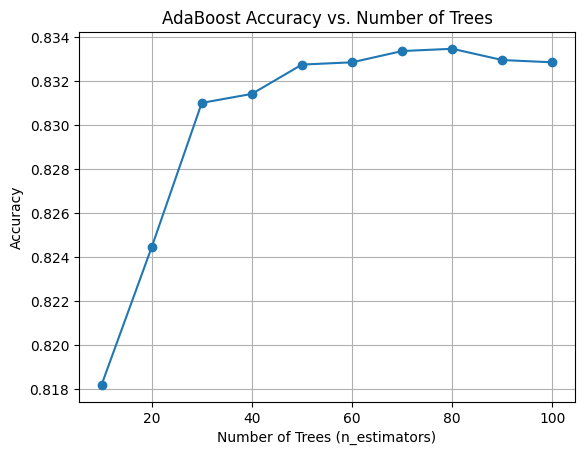

In [2]:
#income
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())

# Split features and target
X = df.drop("income_level", axis=1)
y = df["income_level"]

# Encode target if necessary (e.g., if it's strings)
y = y.astype('category').cat.codes  # Converts labels to numeric

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train AdaBoost with default n_estimators = 10
ada_default = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    random_state=42
)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators=10: {default_score:.4f}")

# 2. Fine-tune n_estimators
scores = {}
for n in range(10, 110, 10):  # Try 10 to 100 in steps of 10
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        random_state=42
    )
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[n] = acc

# Find best score and corresponding number of estimators
best_n = max(scores, key=scores.get)
best_score = scores[best_n]
print(f"Best accuracy: {best_score:.4f} with n_estimators={best_n}")

# Plot
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs. Number of Trees")
plt.grid(True)
plt.show()
